In [25]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

# Image Classification with HOG Feature and Neural Networks

## 1. Dataset Preparation

In [26]:
ls images/mnist-dataset/

Invalid switch - "mnist-dataset".


**Load image dataset**

In [27]:
train_images, train_labels = loadlocal_mnist(images_path='images/mnist-dataset/train-images-idx3-ubyte',
                                             labels_path='images/mnist-dataset/train-labels-idx1-ubyte')

In [28]:
test_images, test_labels = loadlocal_mnist(images_path='images/mnist-dataset/t10k-images-idx3-ubyte',
                                             labels_path='images/mnist-dataset/t10k-labels-idx1-ubyte')

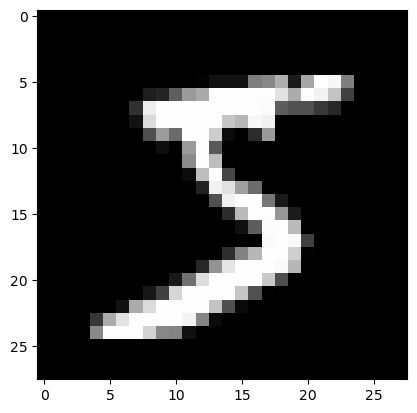

In [29]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

In [30]:
train_labels[0]

5

**Test extract HOG feature from image**

In [31]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [32]:
feature.shape

(144,)

<BarContainer object of 144 artists>

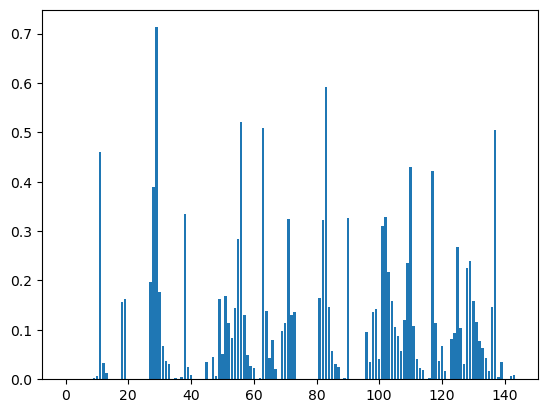

In [33]:
plt.bar(list(range(feature.shape[0])), feature)

In [34]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

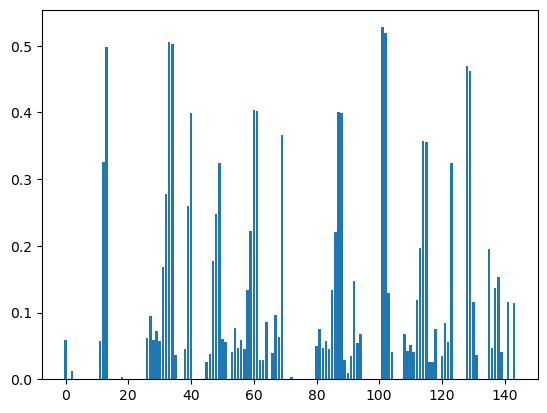

In [35]:
plt.bar(list(range(feature.shape[0])), feature)

## 2. Preprocessing using HOG Feature Extraction

In [36]:
n_dims = feature.shape[0]

In [37]:
n_dims

144

In [38]:
n_samples = train_images.shape[0]

In [39]:
n_samples

60000

**Create variable for dataset**

In [40]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [41]:
X_train.shape

(60000, 144)

**Get HOG feature from each image & put into dataset variable**

In [42]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

**Convert categorical label to one hot label**

In [43]:
from sklearn.preprocessing import LabelBinarizer

In [44]:
lb = LabelBinarizer()

In [45]:
lb.fit(y_train)

LabelBinarizer()

In [46]:
y_train_one_hot = lb.transform(y_train)

In [47]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [48]:
y_train[0]

5

In [49]:
import numpy as np

In [50]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [51]:
label[0]

5

## 3. Classification with Neural Networks

In [52]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [53]:
clf.fit(X_train, y_train_one_hot)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

## 4. Predict Test Dataset 

In [58]:
n_samples = test_images.shape[0]

In [55]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [61]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [62]:
y_test_one_hot = lb.transform(y_test)

In [63]:
y_pred_one_hot = clf.predict(X_test)

In [64]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [65]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

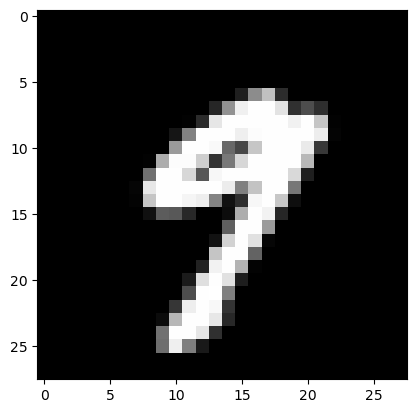

In [66]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [67]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [68]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [69]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [70]:
out[0]

9

## 5. Evaluation Metrics

### 5. 1 Confussion Matrix

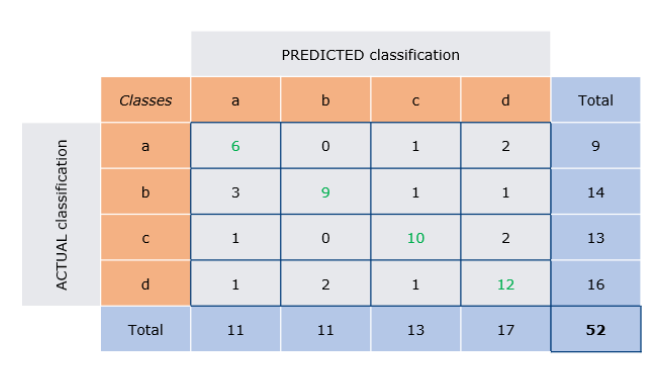

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
conf_mat = confusion_matrix(y_test, y_pred)

In [75]:
conf_mat

array([[ 974,    0,    0,    1,    0,    1,    3,    1,    0,    0],
       [  17, 1109,    4,    0,    1,    0,    2,    0,    2,    0],
       [  45,    4,  968,    4,    0,    0,    1,    6,    3,    1],
       [  28,    0,   16,  953,    0,    4,    0,    3,    2,    4],
       [  29,    3,    0,    0,  934,    0,    5,    2,    1,    8],
       [  32,    0,    0,   15,    0,  831,    6,    0,    7,    1],
       [  24,    1,    0,    0,    6,   12,  915,    0,    0,    0],
       [  45,    1,   21,    2,   13,    0,    0,  936,    1,    9],
       [  43,    1,    3,    6,    3,    8,    2,    0,  901,    7],
       [  38,    0,    0,    0,   11,    3,    0,    9,   13,  935]],
      dtype=int64)

In [76]:
from mlxtend.plotting import plot_confusion_matrix

In [77]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

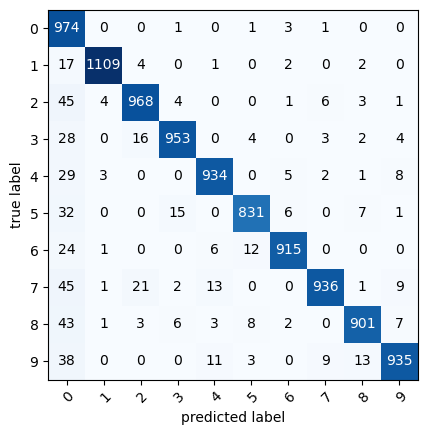

In [78]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

### 5.2 Precission

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [79]:
from sklearn.metrics import precision_score

In [80]:
precision = precision_score(y_test, y_pred, average=None)

In [81]:
precision

array([0.76392157, 0.99106345, 0.95652174, 0.9714577 , 0.96487603,
       0.96740396, 0.97965739, 0.97805643, 0.9688172 , 0.96891192])

### 5.3 Recall

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall = recall_score(y_test, y_pred, average=None)

In [84]:
recall

array([0.99387755, 0.97709251, 0.9379845 , 0.94356436, 0.95112016,
       0.93161435, 0.95511482, 0.91050584, 0.92505133, 0.92666006])

### 5.4 Accuracy

$$\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}$$

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, y_pred)

In [87]:
accuracy

0.9456

### 5.5 F1-Score

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [88]:
from sklearn.metrics import f1_score

In [89]:
f1 = f1_score(y_test, y_pred, average='macro')

In [90]:
f1

0.9463524578424375